$\textbf{Assignment Lab 6}$

Name: Vicente Valenzuela Carrasco

Code that I'll we be basing my results:

In [25]:
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')



class Integ61(Integrator):

    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)

    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)

    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f
    ###
def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-50, 50))
    ax.set_ylim((-50, 50))
    ax.set_zlim((0, 200))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75, label='initial')
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75, label='last')
    ax.legend()
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

------------------------------------------------------------------------------------------------------------------------------------------------------------

[Problem Experiment](#prob_experiment) 

Lorenz’ results are based on the following values of the physical parameters taken from Saltzman’s paper (Saltzman, 1962): $$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ 
As you will see in [Section stability](#sec_stability), there is a *critical value of the parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of $\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.
    
-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

1.  Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.

2.  One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.

3.  Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?

------------------------------------------------------------------------------------------------------------------------------------------------------------

Fixing the initial condition $(x_{0},y_{0},z_{0})=(5,5,5)$ and vary $\rho$ between 0 and 100

In the following code creates a range of numbers for $\rho$ from 0 to 100, generating 9 plots with di

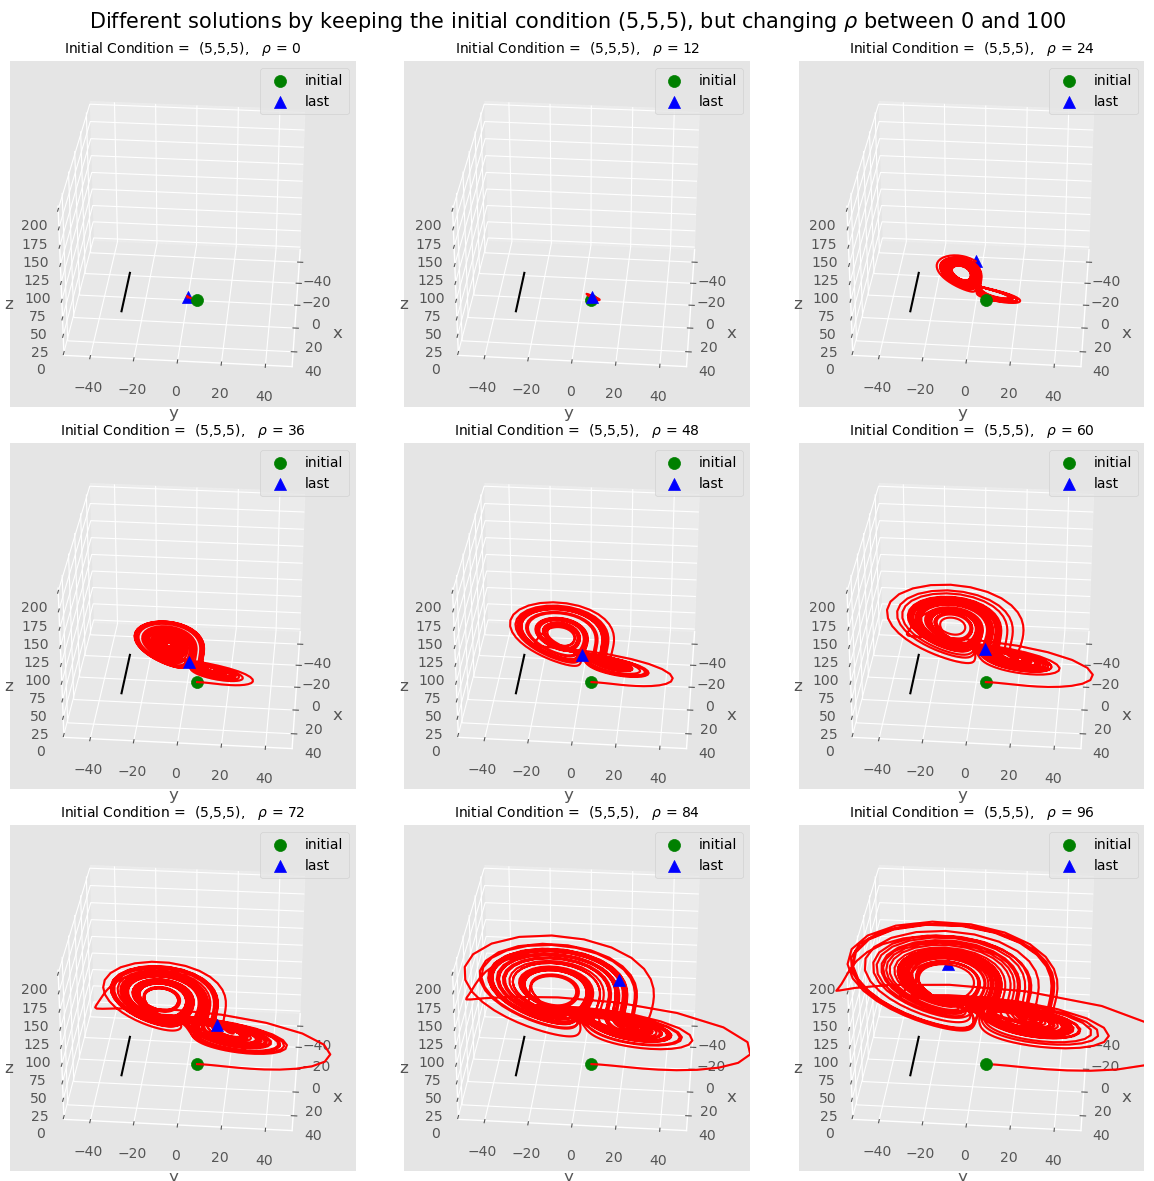

In [26]:

fig = plt.figure(figsize=(12, 12))

for i, rho_value in enumerate(np.arange(0, 100, 12)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=rho_value)
    initvars = dict(x=5, y=5, z=5)
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition =  (5,5,5),   $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
plt.suptitle(r'Different solutions by keeping the initial condition (5,5,5), but changing $\rho$ between 0 and 100', fontsize=15)
plt.tight_layout()
plt.show()

 Fixing $\rho=28$, and varying the initial conditions:
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(8.5,-8.5,27)$, $(-20,20,40)$,
    $(40,40,60)$, $(80,80,80)$

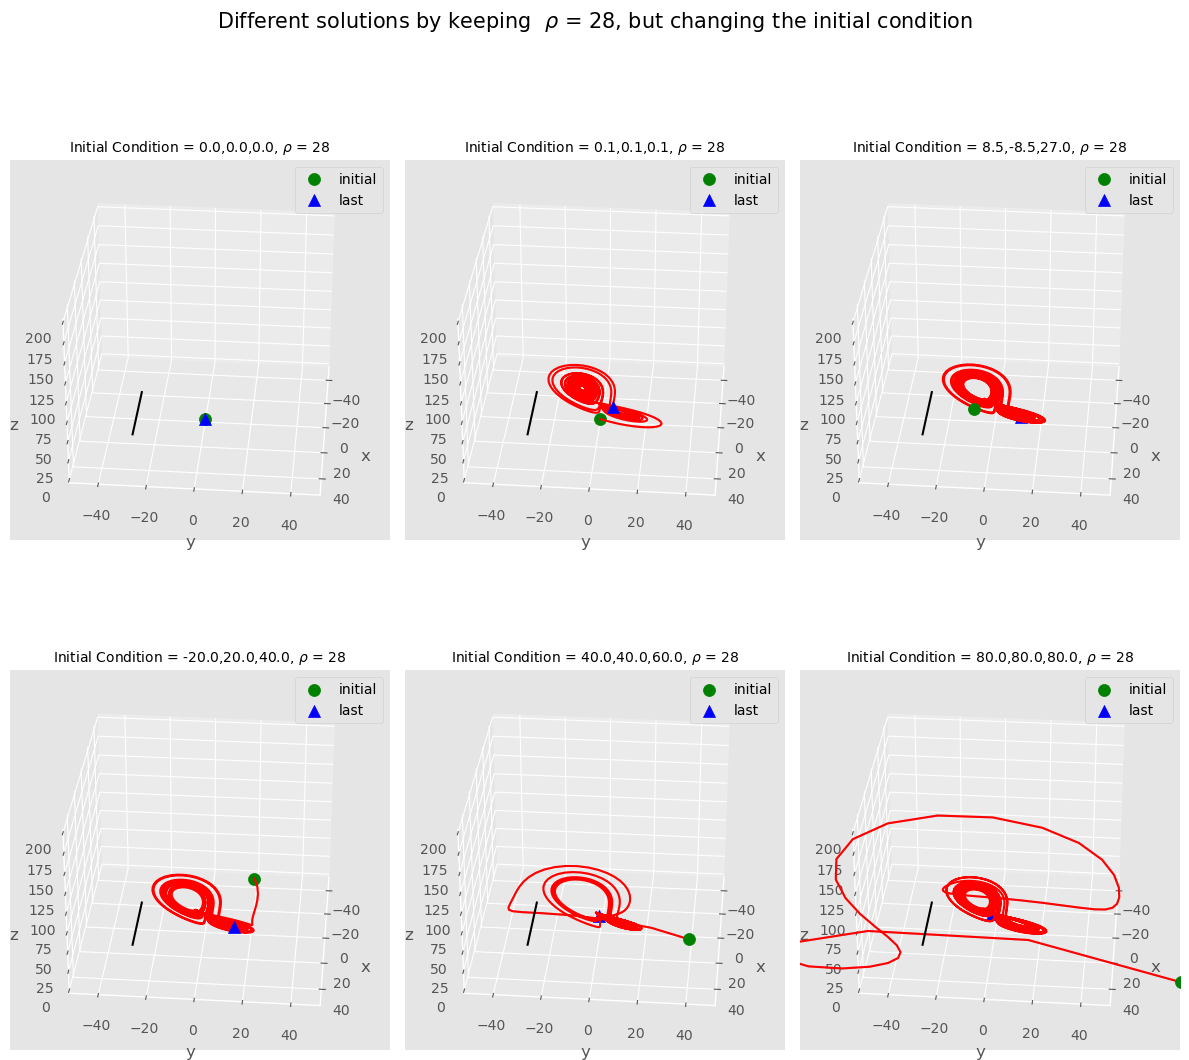

In [27]:
fig = plt.figure(figsize=(12, 12))
x_values = [0,0.1,8.5,-20,40,80]
y_values = [0,0.1,-8.5,20,40,80]
z_values = [0,0.1,27,40,60,80]
for i in range(len(x_values)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=28)
    initvars = dict(x=x_values[i], y=y_values[i], z=z_values[i])
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition = {},{},{}'.format(*coords[0,:])  + r', $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
plt.suptitle(r'Different solutions by keeping  $\rho$ = 28, but changing the initial condition', fontsize=15)
plt.tight_layout()
plt.show()

**[Problem Sensitivity](#prob_sensitivity)** 
    
One property of chaotic systems such as the Lorenz equations is their *sensitivity to initial
conditions* – a consequence of the “butterfly effect.” Modify your code from [Problem adaptive](#prob_adaptive) to compute two trajectories (in the chaotic regime $r>r^\ast$) with different initial conditions *simultaneously*. Use two initial conditions that are very close to each other, say $(1,1,20)$ and $(1,1,20.001)$. Use your “method of choice” (adaptive/non-adaptive), and plot the distance between the two trajectories as a function of time. What do you see?

One important limitation of numerical methods is immediately evident when approximating non-periodic dynamical systems such as the Lorenz equations: namely, *every computed solution is periodic*. That is, when we’re working in floating point arithmetic, there are only finitely many numbers that can be represented, and the solution must eventually repeat itself. When using single precision arithmetic, a typical computer can represent many more floating point numbers than we could ever perform integration steps in a numerical scheme. However, it is still possible that round-off error might introduce a periodic orbit in the numerical solution where one does not really exist. In our computations, this will not be a factor, but it is something to keep in mind.

In [28]:
import time

The elapsed time for the ADAPTIVE timestep calculation was 0.3930690288543701 seconds.


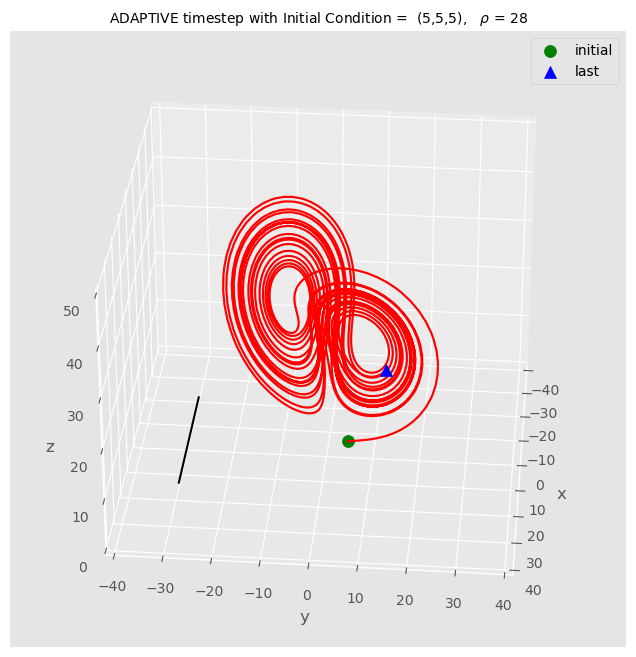

In [29]:
timevars = dict(tstart=0, tend=27, dt=0.01)
uservars = dict(sigma=10, beta=2.6666, rho=28)
initvars = dict(x=5, y=5, z=5)
params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
#
theSolver = Integ61('lorenz.yaml', **params)
# ADAPTIVE
tic = time.time()
timevals, coords, errorlist = theSolver.timeloop5Err()
elapsed = time.time() - tic
xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]
#
fig = plt.figure(figsize=(8, 8))
# First subplot for ADAPTIVE timestep
ax = fig.add_subplot(projection='3d')
ax = plot_3d(ax, xvals, yvals, zvals)
ax.set_title(r'ADAPTIVE timestep with Initial Condition =  (5,5,5),   $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
ax.set_xlim((-40, 40))
ax.set_ylim((-40, 40))
ax.set_zlim((0, 50))
#
print('The elapsed time for the ADAPTIVE timestep calculation was ' + str(elapsed) +' seconds.')

The elapsed time for the NON-ADAPTIVE timestep calculation was 0.34473085403442383 seconds.


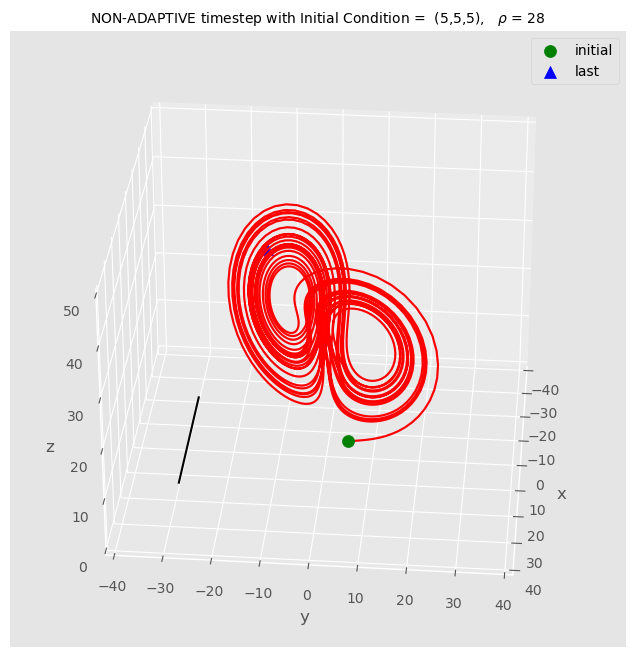

In [30]:
# NON-ADAPTIVE
tic = time.time()
timevals, coords, errorlist = theSolver.timeloop5fixed()
elapsed = time.time() - tic
xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]
#
fig = plt.figure(figsize=(8, 8))
# First subplot for NON-ADAPTIVE timestep
ax = fig.add_subplot(projection='3d')
ax = plot_3d(ax, xvals, yvals, zvals)
ax.set_title(r'NON-ADAPTIVE timestep with Initial Condition =  (5,5,5),   $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
ax.set_xlim((-40, 40))
ax.set_ylim((-40, 40))
ax.set_zlim((0, 50))
#
print('The elapsed time for the NON-ADAPTIVE timestep calculation was ' + str(elapsed) +' seconds.')

The elapsed time by using the NON-ADAPTIVE timestep, is smaller. So, for the next part I'll use the fixed timestep for calculating the trajectories.

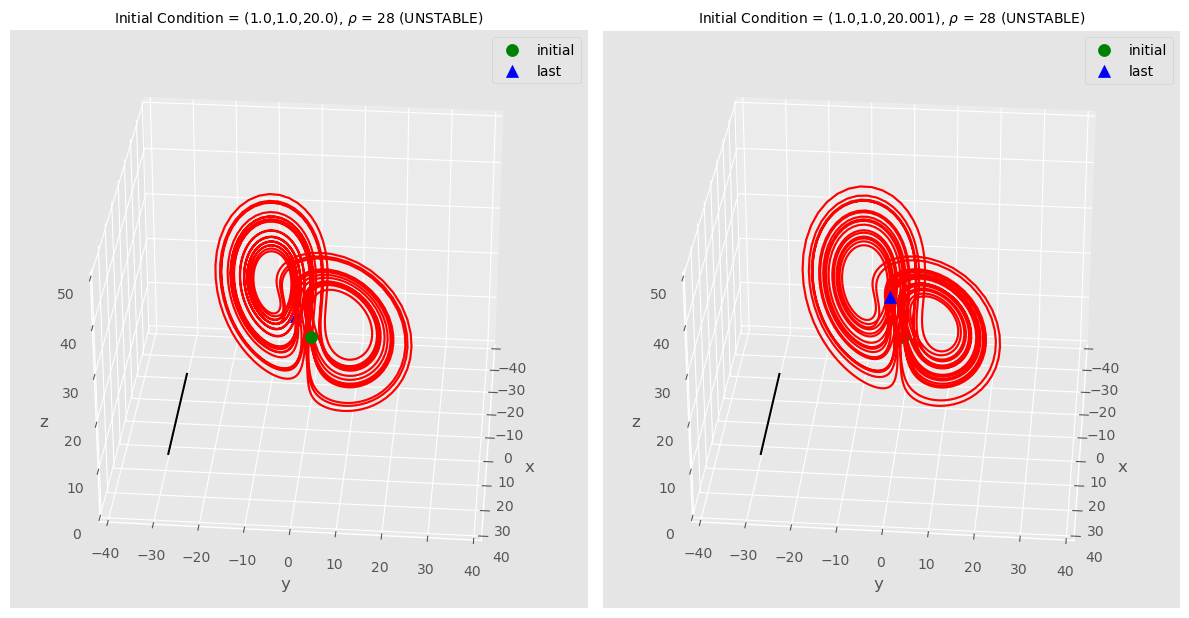

In [31]:
fig = plt.figure(figsize=(12, 12))
x_values = [1,1]
y_values = [1,1]
z_values = [20,20.001]
for i in range(len(x_values)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=28)
    initvars = dict(x=x_values[i], y=y_values[i], z=z_values[i])
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition = ({},{},{})'.format(*coords[0,:])  + r', $\rho$ = {} (UNSTABLE)'.format(params['uservars']['rho']), fontsize=10)
    ax.set_xlim((-40, 40))
    ax.set_ylim((-40, 40))
    ax.set_zlim((0, 50))
plt.tight_layout()
plt.show()
    #


Now, we take the difference in their trajectories at each point in time. With this we will get a distance between both trajectories which have dfferent initial conditions.

First trajectory:

In [32]:
timevars_0 = dict(tstart=0, tend=27, dt=0.01)
uservars_0 = dict(sigma=10, beta=2.6666, rho=28)
initvars_0 = dict(x=1, y=1, z=20)
params_0 = dict(timevars=timevars_0, uservars=uservars_0, initvars=initvars_0)

theSolver = Integ61('lorenz.yaml', **params_0)
timevals_0, coords_0, errorlist_0 = theSolver.timeloop5fixed()
xvals_0, yvals_0, zvals_0 = coords_0[:, 0], coords_0[:, 1], coords_0[:, 2]

Second trajectory:

In [33]:
timevars_1 = dict(tstart=0, tend=27, dt=0.01)
uservars_1 = dict(sigma=10, beta=2.6666, rho=28)
initvars_1 = dict(x=1, y=1, z=20.001)
params_1 = dict(timevars=timevars_1, uservars=uservars_1, initvars=initvars_1)

theSolver = Integ61('lorenz.yaml', **params_1)
timevals_1, coords_1, errorlist_1 = theSolver.timeloop5fixed()
xvals_1, yvals_1, zvals_1 = coords_1[:, 0], coords_1[:, 1], coords_1[:, 2]

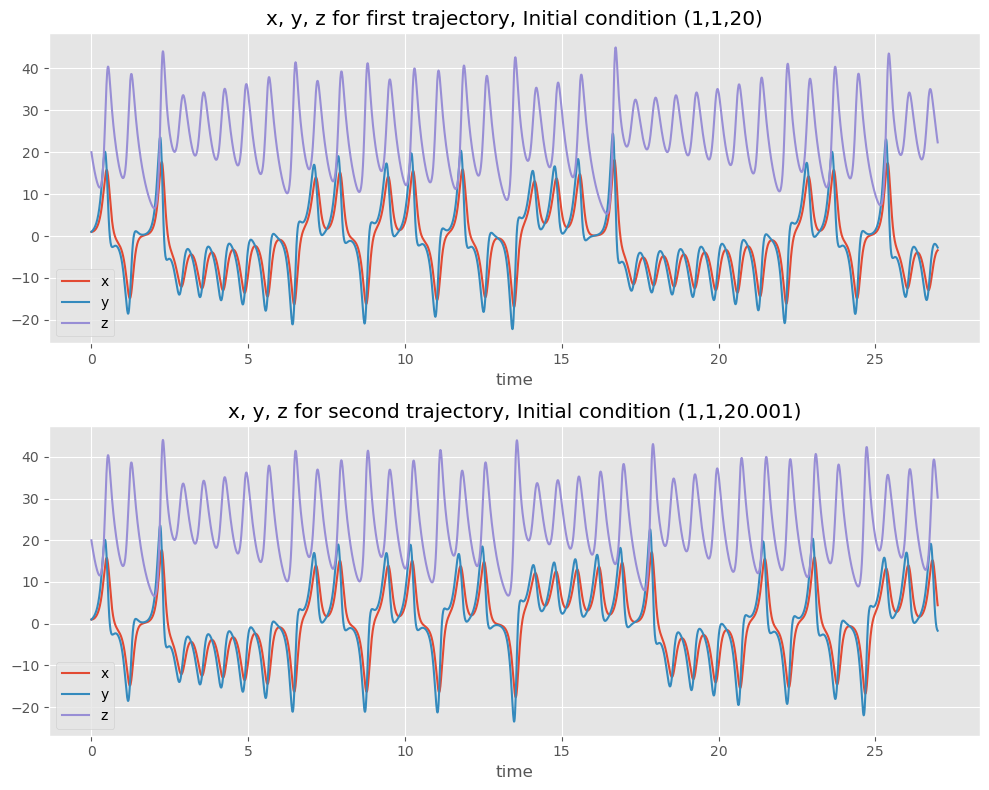

In [34]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(timevals_0,xvals_0,label='x')
ax[0].plot(timevals_0,yvals_0,label='y')
ax[0].plot(timevals_0,zvals_0,label='z')
ax[0].set(title='x, y, z for first trajectory, Initial condition (1,1,20)',xlabel='time')
ax[0].legend()
#
ax[1].plot(timevals_1,xvals_1,label='x')
ax[1].plot(timevals_1,yvals_1,label='y')
ax[1].plot(timevals_1,zvals_1,label='z')
ax[1].set(title='x, y, z for second trajectory, Initial condition (1,1,20.001)',xlabel='time')
ax[1].legend()
#
plt.tight_layout()

The distance between two points in three dimensions can be calculated as follows:

$$d(x,y,z) = \sqrt{(x_1 - x_0)^{2} + (y_1 - y_0)^{2} + (z_1 - z_0)^{2}}$$

In [35]:
diff_x = xvals_1 - xvals_0
diff_y = yvals_1 - yvals_0
diff_z = zvals_1 - zvals_0
#
dist_3d = np.sqrt((diff_x**2) + (diff_y**2) + (diff_z**2))

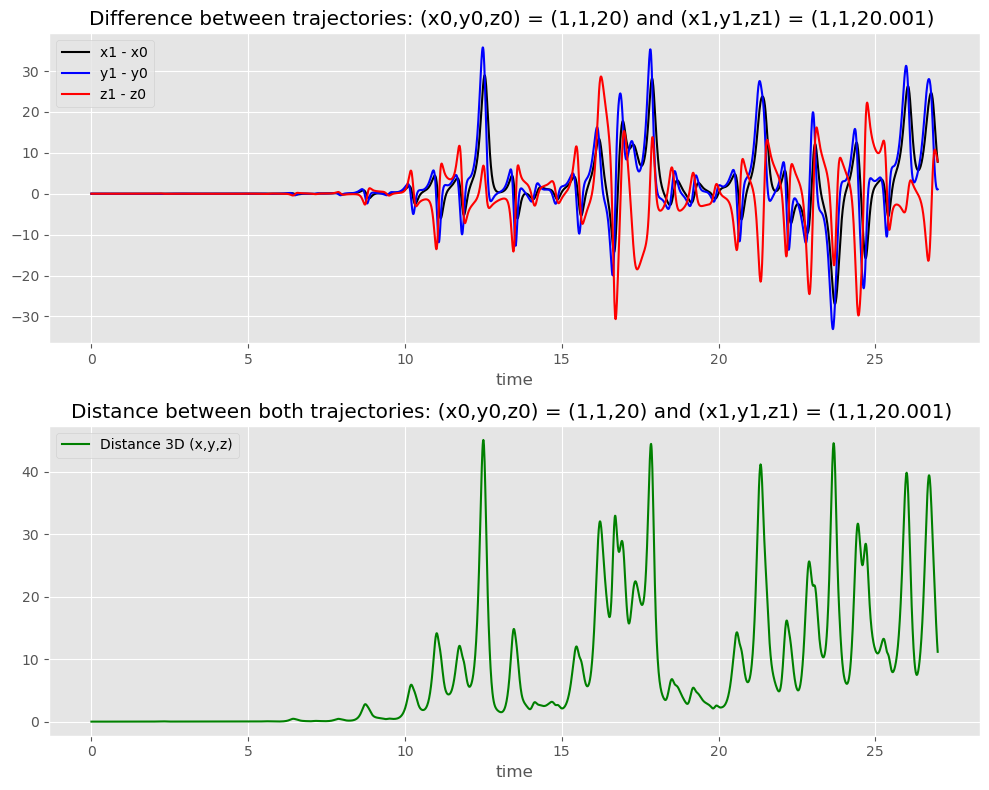

In [37]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(timevals_0,diff_x,'k',label='x1 - x0')
ax[0].plot(timevals_0,diff_y,'b',label='y1 - y0')
ax[0].plot(timevals_0,diff_z,'r',label='z1 - z0')
ax[0].set(title='Difference between trajectories: (x0,y0,z0) = (1,1,20) and (x1,y1,z1) = (1,1,20.001) ',xlabel='time')
ax[0].legend()
#
ax[1].plot(timevals_1,dist_3d,'g',label='Distance 3D (x,y,z)')
ax[1].set(title='Distance between both trajectories: (x0,y0,z0) = (1,1,20) and (x1,y1,z1) = (1,1,20.001) ',xlabel='time')
ax[1].legend()
#
plt.tight_layout()